# PCA Visualization in Python with Plotly and Skitlearn

In [123]:
import pandas as pd
import plotly.express as px

df = pd.read_excel('matrice_acciai.xlsx')
df

,Sample,Cr,Cu,Mo,Mn,Ni,Pb,V
0,graffetta,0.000121,0.000127,0.000024,0.002082,0.002082,0.002082,4.914005e-07
1,orologio,0.000350,0.001720,0.000101,0.000530,0.000530,0.000530,5.297995e-04
2,filo,0.248976,0.002567,0.018497,0.001211,0.001211,0.001211,1.210907e-03
3,taglierino,0.000481,0.000489,0.000084,0.000644,0.000644,0.000644,6.438077e-04
4,fascetta,0.003069,0.000056,0.000032,0.002417,0.002417,0.002417,2.416516e-03
5,foglio,0.132510,0.000610,0.000122,0.004197,0.004197,0.004197,4.197391e-03
6,siringa,0.155492,0.002507,0.003688,0.003688,0.003688,0.003688,3.688312e-03
7,spillo,0.000319,0.000245,0.000073,0.000073,0.000073,0.000073,7.279426e-05
8,filino,0.000478,0.000491,0.000080,0.000080,0.000080,0.000080,8.041389e-05
9,lama,0.099967,0.000122,0.000227,0.000227,0.000227,0.000227,2.266394e-04


In [124]:
print(f"features: {df.columns[1:]}")
print(f"number of sample: {df.index}")

features: Index(['Cr', 'Cu', 'Mo', 'Mn', 'Ni', 'Pb', 'V'], dtype='object')
number of sample: RangeIndex(start=0, stop=12, step=1)


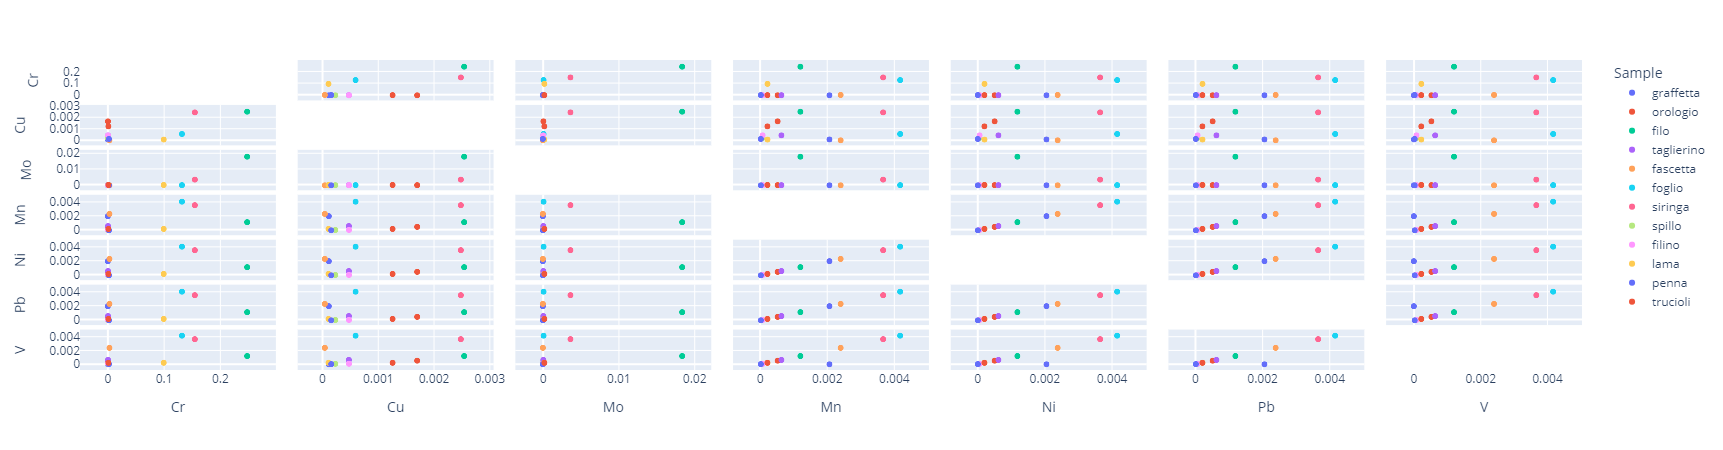

In [125]:
columns = df.columns[1:]

fig = px.scatter_matrix(
    df,
    dimensions=columns,
    color="Sample"
)
fig.update_traces(diagonal_visible=False)
fig.show()

## Autoscaliing

In [131]:
from sklearn.preprocessing import StandardScaler
features = df.columns[1:]
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Sample']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

## Perform PCA number

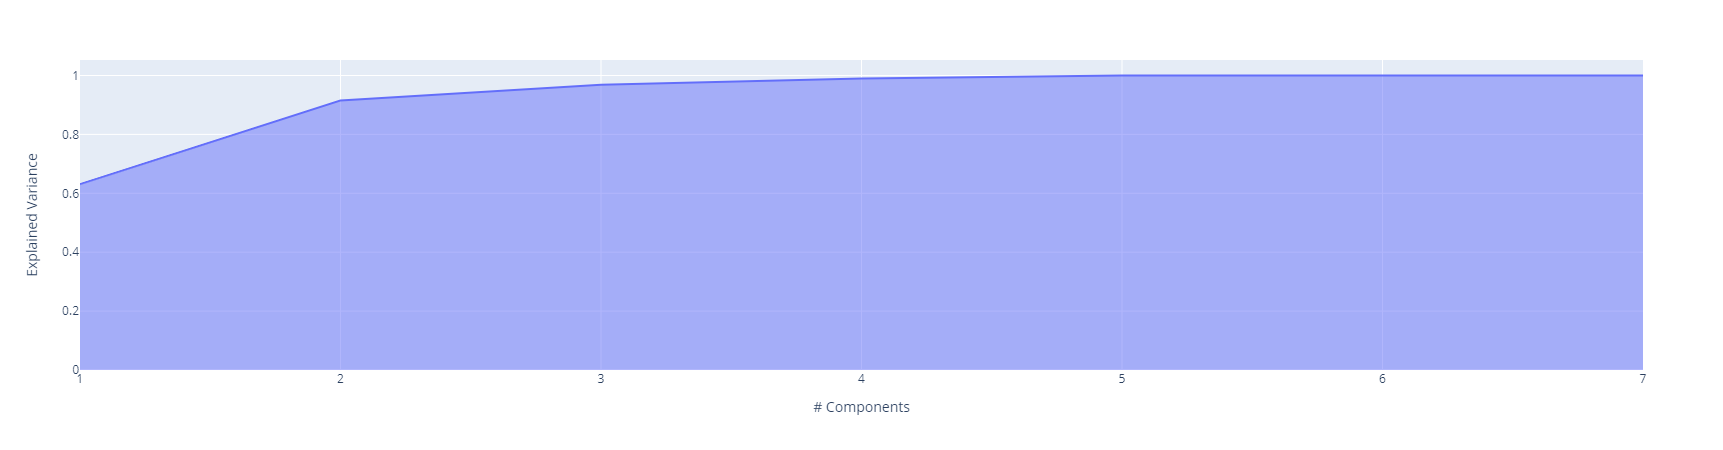

In [132]:
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_diabetes

pca = PCA()
pca.fit(x)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [133]:
import ipywidgets as widgets

number=widgets.FloatSlider(
    value=2,
    min=2,
    max=exp_var_cumul.shape[0] + 1,
    step=1,
    description='Number of PCA:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
display(number)

FloatSlider(value=2.0, continuous_update=False, description='Number of PCA:', max=8.0, min=2.0, readout_format…

## Plot of PC# vs PC#

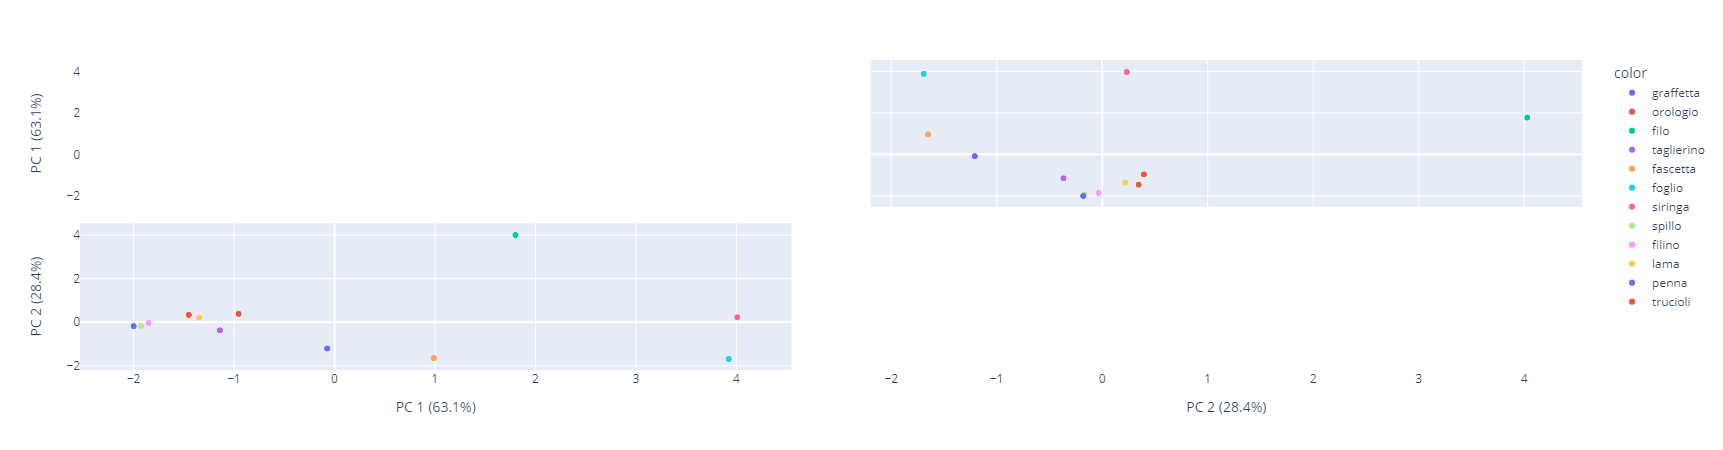

In [134]:
from sklearn.decomposition import PCA

pca = PCA()
components = pca.fit_transform(x)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(int(number.value)),
    color=df["Sample"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

# Single Plot PC# vs PC#

Selecting PC for axes

In [135]:
n=int(number.value)
xaxe=widgets.BoundedIntText(
    value=1,
    min=1,
    max=n,
    step=1,
    description='Text:',
    disabled=False
)

yaxe=widgets.BoundedIntText(
    value=2,
    min=1,
    max=n,
    step=1,
    description='Text:',
    disabled=False
)

display(xaxe,yaxe)

BoundedIntText(value=1, description='Text:', max=2, min=1)

BoundedIntText(value=2, description='Text:', max=2, min=1)

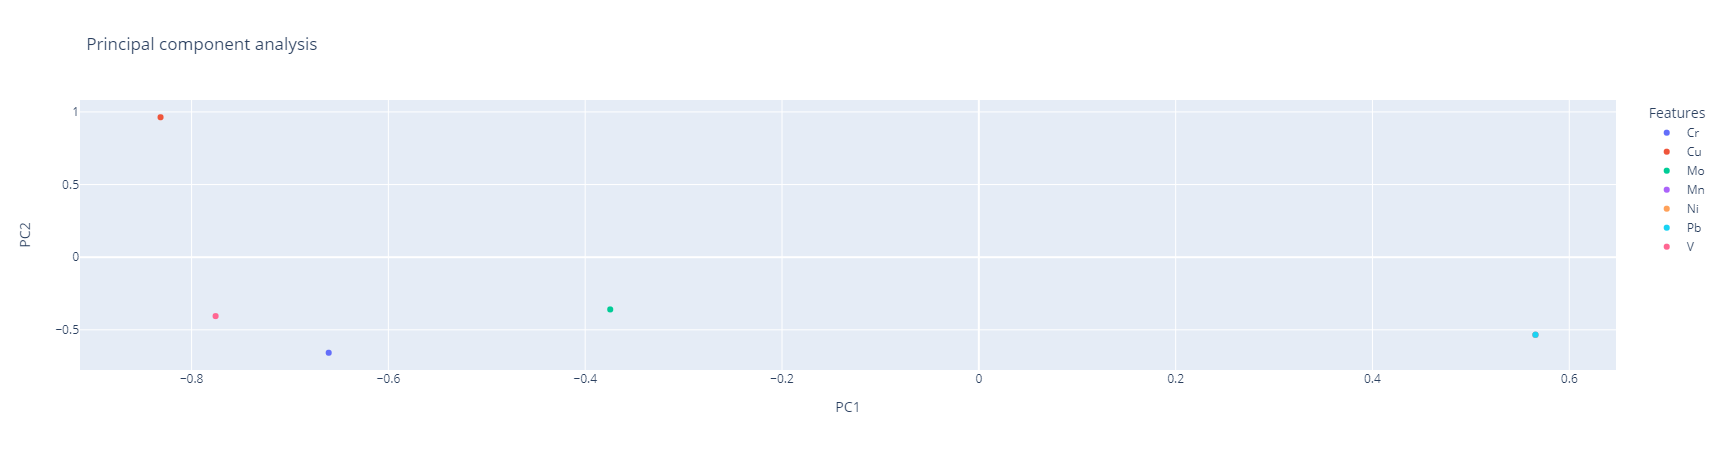

In [136]:
fig = px.scatter(x, x=x[int(xaxe.value)-1],y=x[int(yaxe.value)-1], color=columns, labels={
                     "x": "PC"+str(int(xaxe.value)),
                     "y": "PC"+str(int(yaxe.value)),
                     "color": "Features"
                 },
                title="Principal component analysis")
fig.show()

# PCA fatta a mano
https://www.youtube.com/watch?v=eAcYYH9pKQ4&ab_channel=MadeSimple

In [45]:
import pandas as pd

df = pd.read_excel('matrice_acciai.xlsx')
df

,Sample,Cr,Cu,Mo,Mn,Ni,Pb,V
0,graffetta,0.000121,0.000127,0.000024,0.002082,0.002082,0.002082,4.914005e-07
1,orologio,0.000350,0.001720,0.000101,0.000530,0.000530,0.000530,5.297995e-04
2,filo,0.248976,0.002567,0.018497,0.001211,0.001211,0.001211,1.210907e-03
3,taglierino,0.000481,0.000489,0.000084,0.000644,0.000644,0.000644,6.438077e-04
4,fascetta,0.003069,0.000056,0.000032,0.002417,0.002417,0.002417,2.416516e-03
5,foglio,0.132510,0.000610,0.000122,0.004197,0.004197,0.004197,4.197391e-03
6,siringa,0.155492,0.002507,0.003688,0.003688,0.003688,0.003688,3.688312e-03
7,spillo,0.000319,0.000245,0.000073,0.000073,0.000073,0.000073,7.279426e-05
8,filino,0.000478,0.000491,0.000080,0.000080,0.000080,0.000080,8.041389e-05
9,lama,0.099967,0.000122,0.000227,0.000227,0.000227,0.000227,2.266394e-04


In [46]:
import ipywidgets as widgets
variable=widgets.SelectMultiple(
    options=df.columns,
    #rows=10,
    description='Selection of variable',
    disabled=False
)
display(variable)

SelectMultiple(description='Selection of variable', options=('Sample', 'Cr', 'Cu', 'Mo', 'Mn', 'Ni', 'Pb', 'V'…

## Creation of new database

In [47]:
import numpy as np
d=np.zeros((len(df.index), len(variable.value)))

In [59]:
for j in range(0,len(variable.value)):
    a=variable.value[j]
    for i in range(0,len(df.index)):
        d[i,j]=df[a][i]
d

array([[1.20965504e-04, 1.27035852e-04, 2.44428276e-05, 2.08169478e-03,
        2.08169478e-03, 2.08169478e-03, 4.91400491e-07],
       [3.49782068e-04, 1.72011104e-03, 1.00500891e-04, 5.29799520e-04,
        5.29799520e-04, 5.29799520e-04, 5.29799520e-04],
       [2.48975782e-01, 2.56656694e-03, 1.84967077e-02, 1.21090741e-03,
        1.21090741e-03, 1.21090741e-03, 1.21090741e-03],
       [4.81477277e-04, 4.88814249e-04, 8.40400032e-05, 6.43807685e-04,
        6.43807685e-04, 6.43807685e-04, 6.43807685e-04],
       [3.06884133e-03, 5.59118821e-05, 3.17437254e-05, 2.41651584e-03,
        2.41651584e-03, 2.41651584e-03, 2.41651584e-03],
       [1.32509711e-01, 6.09859606e-04, 1.21528817e-04, 4.19739147e-03,
        4.19739147e-03, 4.19739147e-03, 4.19739147e-03],
       [1.55491767e-01, 2.50665611e-03, 3.68831187e-03, 3.68831187e-03,
        3.68831187e-03, 3.68831187e-03, 3.68831187e-03],
       [3.19469803e-04, 2.45261100e-04, 7.27942594e-05, 7.27942594e-05,
        7.27942594e-05, 7

In [63]:
mean=[]
for i in d:
    m=np.mean(i)
    mean=np.append(mean,m)

In [64]:
mean

array([0.00093115, 0.0006128 , 0.03926896, 0.00051851, 0.00183179,
       0.02143295, 0.02520571, 0.00013267, 0.00019588, 0.01446023,
       0.0003383 , 0.00050584])